## Visualizing PCA Transformation

- Dimension reduction finds patterns in data and uses them to re-express it in a compressed form. VERY helpful for big datasets.
- Helpful also to reduce a dataset to its 'bare bone', discarding noisy features that cause big problems for supervised learning tasks like regression or classification.
- Principal Component Analysis (PCA) is a fundamental of dimensionality reduction technique. It performs dimensionality reduction in two steps.
- First step is **de-correlation**, which doesn't change the dimensions of the data at all. We will focus on this for now.

### Decorrelation & Aligning data with axes

- Rotates data samples to be aligned with axes.
- Shifts data samples so they have mean of 0, no info is lost that way like in the example below.

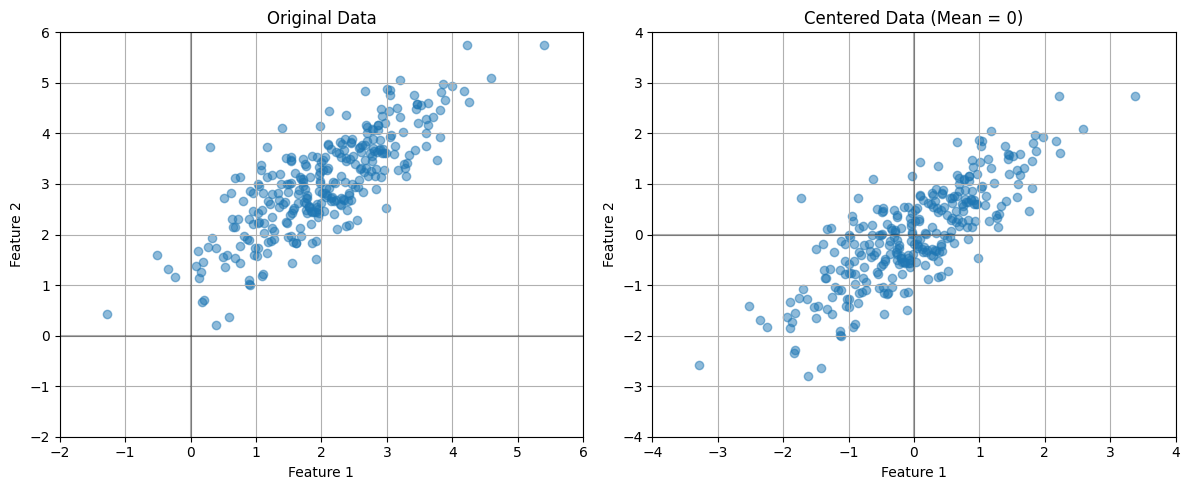

Original data mean: [2.01537093 3.00509085]
Centered data mean: [ 1.01400370e-15 -2.15827356e-15]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate correlated data
np.random.seed(42)
n_samples = 300
mean = [2, 3]  # Original mean not at zero
cov = [[1, 0.8], [0.8, 1]]  # Correlation matrix
data = np.random.multivariate_normal(mean, cov, n_samples)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
ax1.scatter(data[:, 0], data[:, 1], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax1.set_xlim(-2, 6)
ax1.set_ylim(-2, 6)

# Center the data (shift to mean zero)
centered_data = data - np.mean(data, axis=0)

# Plot centered data
ax2.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5)
ax2.set_title('Centered Data (Mean = 0)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# Print the means to verify centering
print("Original data mean:", np.mean(data, axis=0))
print("Centered data mean:", np.mean(centered_data, axis=0))


## PCA follows the fit/transform pattern

- PCA is a scikit-learn component like KMeans and StandardScaler.
- `fit()` learns the transformation from given data. `transform` applies the transformation that the fit learned. In particular, the transform method can be applied to new unseen data samples.

In [3]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(centered_data)
transformed_data = model.transform(centered_data)

print(transformed_data.shape)

(300, 2)


## PCA Features

- After fitting, the number of rows and columns stay the same.
- Rows of transformed correspond to samples.
- Columns of transformed are the 'PCA features', meaning that the columns can be reduced to a smaller number of important features.
- Row gives PCA feature values of corresponding sample.
- PCA features decorrelates since it transforms the values with mean 0. You may measure linear correlation using the Pearson correlation coefficient. It takes values between -1 and 1, where larger values indicate stronger correlation and 0 states no correlation.
- PCA is called 'principal component analysis' because it learns the 'principal components' of the data. These are the directions in which the samples vary the most. It is the principal components that PCA aligns with the coordinate axes.

**Basically** PCA creates new features that are intentionally uncorrelated with each other (decorrelated step). The importance of each feature isn't measured by correlation (because they are already decorrelated), but by the variance of the data along the principal components.

Think of it like this: the first principal component is the direction where you data varies the most, the second component is the next more varying directions (perpendicular to the first), and so on. 

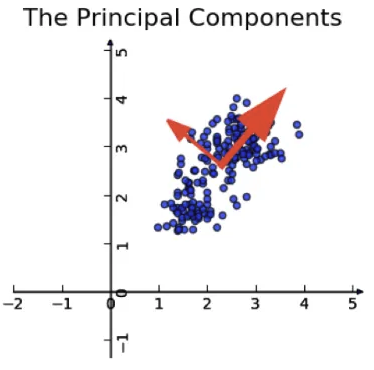

Variance matters because it tells you how much information is in the data. High variance means that our dataset is more spread out and more information is present, low variance means that the data is more clustered and less information is present. We rank our new PCA features based on which feature contains the most variance.

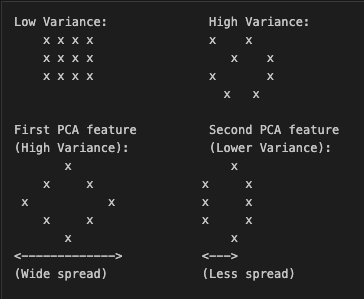